In [1]:
import numpy
from numpy import random
from scipy import stats
import ndd
import itertools
import timeit
random.seed(123)

In [2]:
def timer(func):
    def timed(*a, **kwa):
        import time
        t0 = time.time()
        x  = func(*a, **kwa)
        t1 = time.time()
        return (func.__name__, x, t1-t0)
    return timed

In [3]:
stats.entropy = timer(stats.entropy)
ndd.entropy = timer(ndd.entropy)


In [4]:
def random_counts(n=None, k=None, a=None):
    from scipy.stats import entropy
    pp = random.dirichlet([a]*k)
    pp /= numpy.sum(pp)
    counts = random.multinomial(n, pp)
    return (pp, counts)

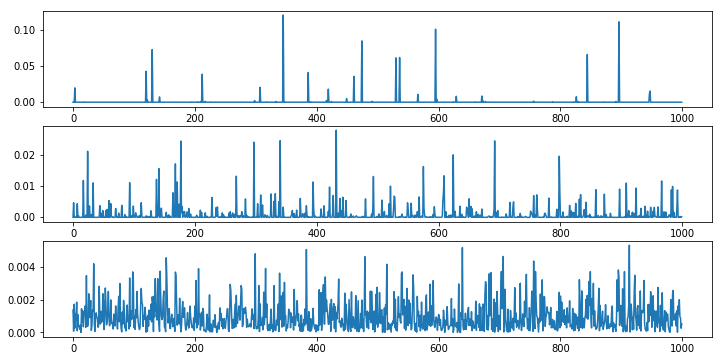

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3,1,figsize=(12,6))
axs[0].plot(random_counts(n=100, k=1000, a=1.e-2)[0])
axs[1].plot(random_counts(n=100, k=1000, a=1.e-1)[0])
axs[2].plot(random_counts(n=100, k=1000, a=1.0)[0])

In [7]:
def compute_rmsd(func, *args, n=None, k=None, a=None):
    n_rep = 2
    res = []
    secs = 0.0
    i_ = 0
    while i_ < n_rep:
        pp, counts = random_counts(n, k, a)
        true = stats.entropy(pp)[1]
        _, h, dt = func(counts, *args)
        res.append(h/true - 1.0)
        i_ += 1
    res = numpy.array(res)
    return (numpy.mean(res), numpy.std(res))

In [8]:
k_s = numpy.logspace(4, 6, num=2, dtype=int)
alpha_s = numpy.logspace(-2, 0, num=3, dtype='f8')
n_s = numpy.logspace(2, 4, num=6, dtype=int)

data = numpy.empty((2,3,4,len(n_s)))
for i1_, k in enumerate(k_s):
    for i2_, a in enumerate(alpha_s):
        estimator = ndd.entropy
        args = (k)
        result = [compute_rmsd(estimator, args, n=n, k=k, a=a) for n in n_s]
        data[i1_, i2_, 0, :], data[i1_, i2_, 1, :] = zip(*result)
        estimator = stats.entropy
        args = ()
        result = [compute_rmsd(estimator, *args, n=n, k=k, a=a) for n in n_s]
        data[i1_, i2_, 2, :], data[i1_, i2_, 3, :] = zip(*result)

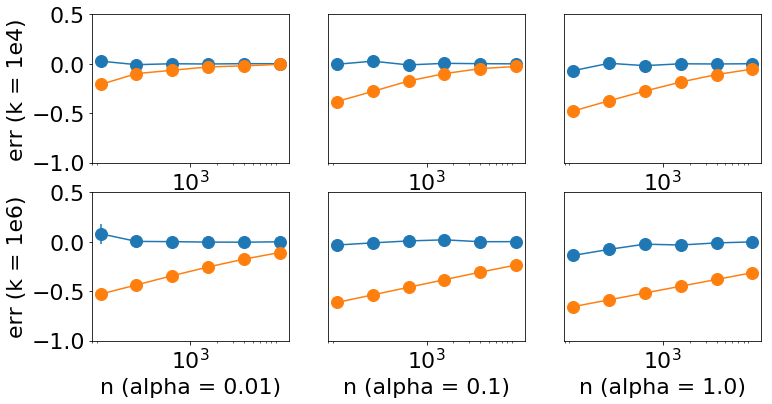

In [37]:
%matplotlib inline
font = {'family' : 'sans-serif',
        'style' : 'normal',
        'weight' : 'medium',
        'size'   : 22}

import matplotlib
matplotlib.rc('font', **font)
matplotlib.rc('tick', **tick)
from matplotlib import pyplot as plt
#increase the font size and markers size

fig, axs = plt.subplots(2,3,figsize=(12,6))
#axs.semilogy()

for i1_, k in enumerate(k_s):
    for i2_, a in enumerate(alpha_s):
        ax = axs[i1_, i2_]
        ax.semilogx()
        #ax.set_title(str(float(k)) + ',' + str(a))
        ax.set_ylim((-1.0, 0.5))
        if i1_ == 1:
            ax.set_xlabel('n (alpha = %s)' % a)
        else:
            ax.set_xlabel('')
            #ax.axes.get_xaxis().set_visible(False)
        if i2_ == 0:
            ax.set_ylabel('err (k = 1e%s)' % int(numpy.log10(k)))
        else:
            ax.axes.get_yaxis().set_visible(False)
            
        ys = data[i1_, i2_, 0, :]
        dys = data[i1_, i2_, 1, :]
        ax.errorbar(n_s, ys, yerr=dys, fmt='-o', label='NSB')
        
        ys = data[i1_, i2_, 2, :]
        dys = data[i1_, i2_, 3, :]
        ax.errorbar(n_s, ys, yerr=dys, fmt='-o', label='ML')
        
    #plt.legend(loc='upper left', shadow=True)
# Set common labels
#fig.text(0.5, 0.04, 'n (alpha = 0.01, 0.1, 1)', ha='center', va='center')
#fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

In [112]:
def compute_time(func, *args, n=None, k=None, a=None):
    n_rep = 20
    res = []
    secs = 0.0
    i_ = 0
    while i_ < n_rep:
        pp, counts = random_counts(n, k, a)
        true = stats.entropy(pp)[1]
        _, h, dt = func(counts, *args)
        res.append(dt)
        i_ += 1
    res = numpy.array(res)
    return (numpy.mean(res), numpy.std(res))

In [113]:
k_s = numpy.logspace(4, 6, num=2, dtype=int)
alpha_s = numpy.logspace(-2, 0, num=3, dtype='f8')
n_s = numpy.logspace(2, 4, num=6, dtype=int)

data = numpy.empty((2,3,4,len(n_s)))
for i1_, k in enumerate(k_s):
    for i2_, a in enumerate(alpha_s):
        estimator = ndd.entropy
        args = (k)
        result = [compute_time(estimator, args, n=n, k=k, a=a) for n in n_s]
        data[i1_, i2_, 0, :], data[i1_, i2_, 1, :] = zip(*result)
        estimator = stats.entropy
        args = ()
        result = [compute_time(estimator, *args, n=n, k=k, a=a) for n in n_s]
        data[i1_, i2_, 2, :], data[i1_, i2_, 3, :] = zip(*result)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
#increase the font size and markers size

from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

fig, axs = plt.subplots(2,3,figsize=(12,6))
#axs.semilogy()

for i1_, k in enumerate(k_s):
    for i2_, a in enumerate(alpha_s):
        ax = axs[i1_, i2_]
        ax.semilogx()
        ax.semilogy()
        #ax.set_title(str(float(k)) + ',' + str(a))
        if i1_ == 0:
            ax.set_ylim((1.e-5, 1.e-2))
        else:
            ax.set_ylim((5.e-3, 2.e-2))
        if i1_ != 1:
            ax.axes.get_xaxis().set_visible(False)
        if i2_ != 0:
            ax.axes.get_yaxis().set_visible(False)
            
        ys = data[i1_, i2_, 0, :]
        dys = data[i1_, i2_, 1, :]
        ax.errorbar(n_s, ys, yerr=dys, fmt='-', label='NSB')
        
        ys = data[i1_, i2_, 2, :]
        dys = data[i1_, i2_, 3, :]
        ax.errorbar(n_s, ys, yerr=dys, fmt='--', label='ML')
        
    #plt.legend(loc='upper left', shadow=True)
# Set common labels
fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

In [38]:
import matplotlib as mpl
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'ax